# ECE 9309/9039 Final Project Progress Report Code-Winter 2023 (GROUP 11)


This notebook contains the code neccessary to support the final report that has been submitted on the 10th of April.

In [4]:
import numpy as np
np.random.seed(42)
import seaborn as sns
import os
import math
import pandas as pd
import numpy as np
#For splitting
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
#For scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#For Stacking
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingClassifier
#For Bagging
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
#For Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
#For evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
#For Stacking with NN
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

In [ ]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


## PART A - PREPARING THE DATA 

### 1. LOAD 
    Reading and loading the dataset. 
### 2. ANALYZE 
    Analyzing the parameters of the data such as size, shape and head.
### 3. PREPROCESS 
    Dropping unneccessary columns and removing empty rows.
### 4. SPLIT
    Splitting the data into desired training and testing sets for the models.
### 5. SCALE
    Sclaing the data by using standard scaling before training the models on the data.

In [5]:
#A1.LOAD
#Read the dataset
# get current working directory and file path
absolute_path = os.getcwd()
relative_path = 'parkdata.csv'
full_path = os.path.join(absolute_path, relative_path)

# read csv file and store in DataFrame
Data = pd.read_csv(full_path)

In [6]:
#A1.ANALYZE
#Print out the info of the dataset
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
#A1.ANALYZE
#Print out the size of the dataset
print("Shape of the data is : ",Data.shape)

#Print out the size of the dataset
print("Size of the data is : ",Data.size)

#Print out the head of the dataset
print("Head of the data is : ",Data.head)

Shape of the data is :  (195, 24)
Size of the data is :  4680
Head of the data is :  <bound method NDFrame.head of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  

<Axes: >

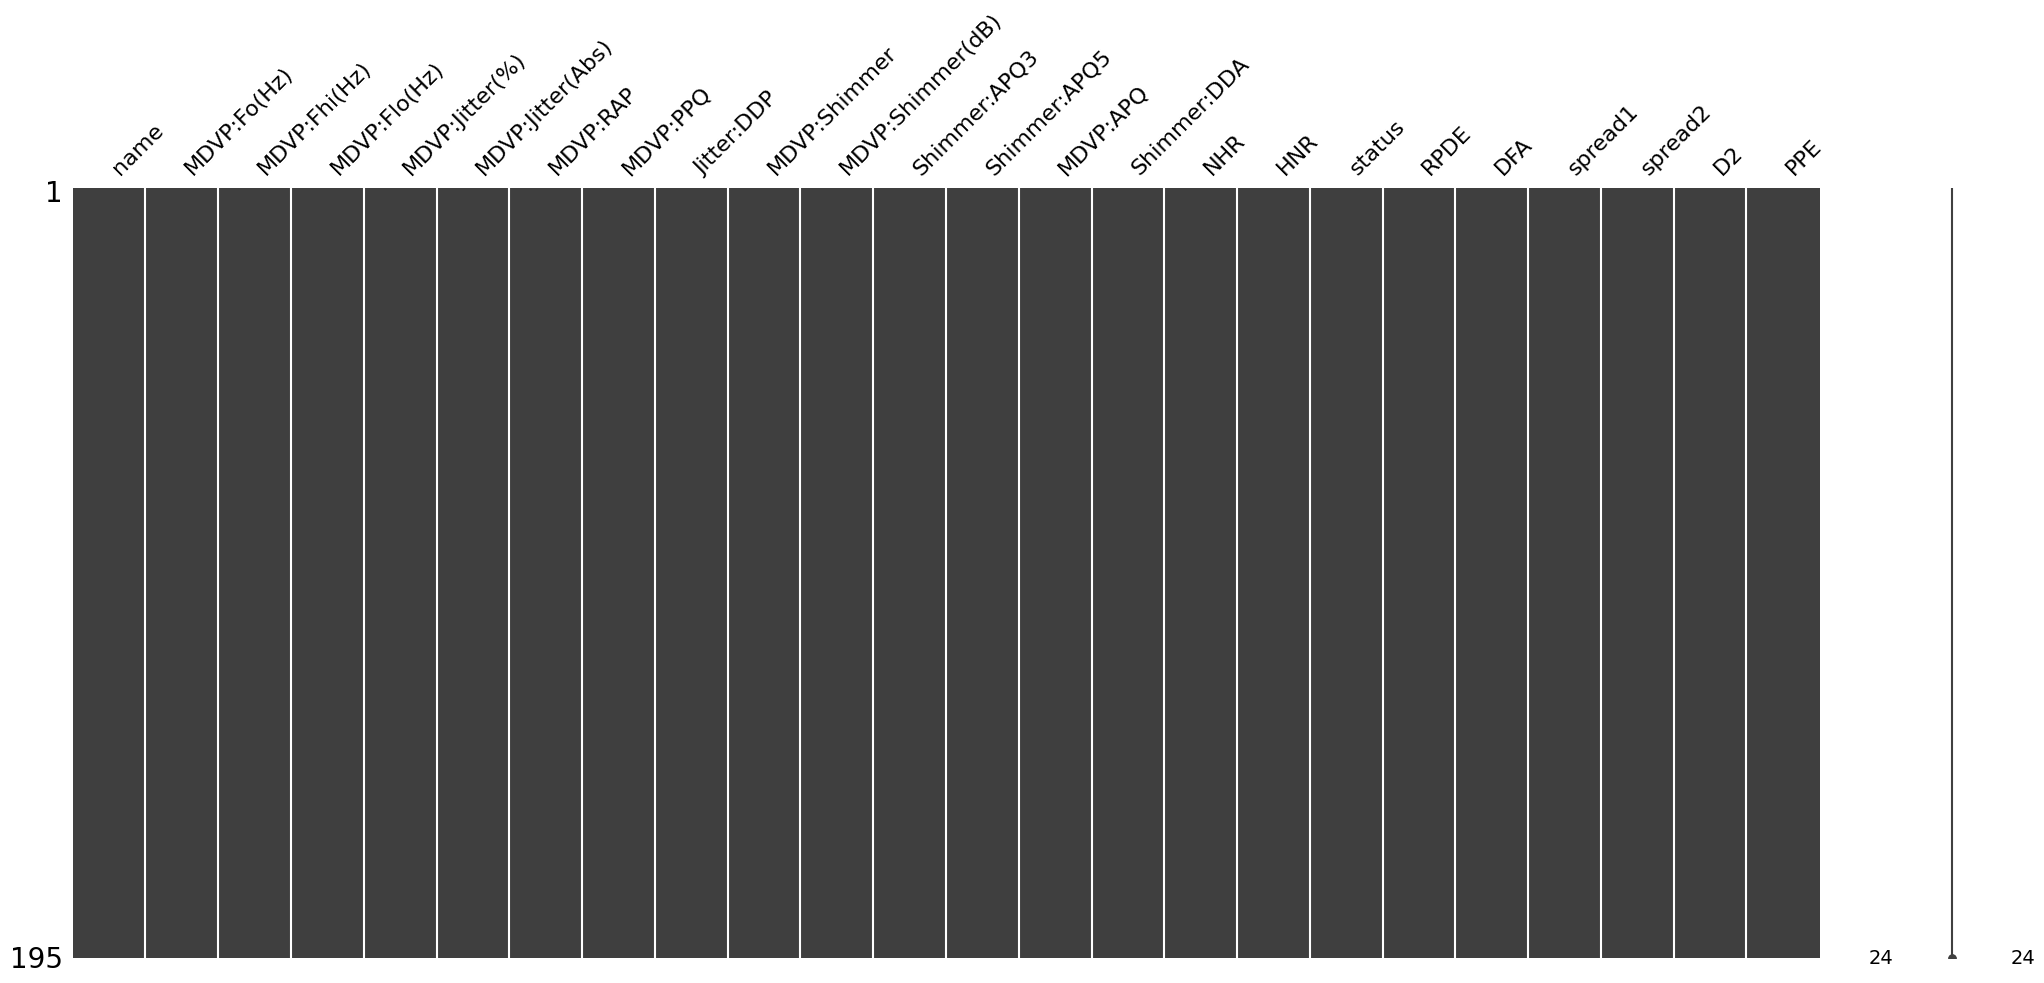

In [8]:
import missingno as msno

# Plotting nullity matrix
msno.matrix(Data)


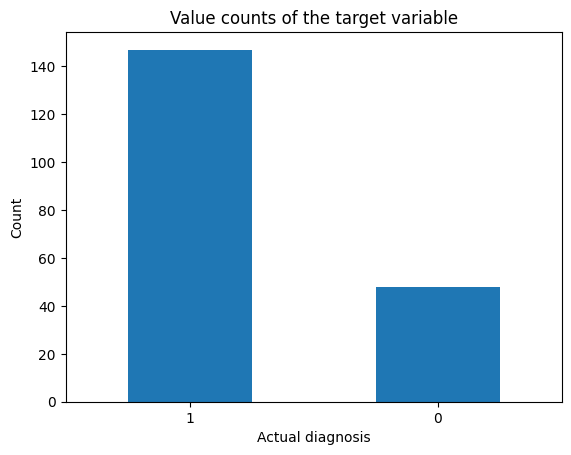

In [9]:
#A1.ANALYZE
#Print out and check whether the classes of the target variable are imbalanced
Data["status"].value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Actual diagnosis")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [10]:
#A1.PREPROCESS
# Define a function called myPreProc that takes in a pandas DataFrame as input
def myPreProc(data):

    # Remove the 'name' column from the DataFrame
    data.drop(['name'], axis=1, inplace=True)

    # Return the feature variables (X) and target variable (y)
    return data

# Preprocess the data using the myPreProc function and store the feature variables in X and target variable in y
df=myPreProc(Data)

#Print out the size of the dataset after preprocessing
print("Shape of the preprocessed data is : ",Data.shape)

Shape of the preprocessed data is :  (195, 23)


In [11]:
#A1.SPLIT
#To split the data
# First separate the feature variables (X) from the target variable (y)
X = df.drop(['status'], axis=1)
y = df['status']

#We use the train_test_split function from the scikit-learn library to split the preprocessed data into training and testing sets
#X represents the features and y represents the target variable
#test_size=0.3 indicates that 30% of the data will be used for testing and 70% for training
#random_state=42 ensures that the random number generator used for shuffling the data is initialized with a fixed seed value, so that the results are reproducible.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#The returned values are the training and testing sets of features (X_train and X_test) and the corresponding target variables (y_train and y_test).
# Finally, we can print the shapes of the training and testing sets
print("Training set shape: X_train = {}, y_train = {}".format(X_train.shape, y_train.shape))
print("Testing set shape: X_test = {}, y_test = {}".format(X_test.shape, y_test.shape))


Training set shape: X_train = (136, 22), y_train = (136,)
Testing set shape: X_test = (59, 22), y_test = (59,)


In [12]:
#A1.SPLIT
#To balance imbalanced data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [13]:
#A1.SCALE
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

## PART B - USING THE ENSEMBLE TECHNIQUES-BAGGING

### 1. APPLY MODELS 
     Applying the models to the prepared data by creating, training, predicting and evaluating the metrics.
     The models that will be applied to this dataset for bagging ensemble techniques are as follows:

    1. Bagging Classifier with Random Forest estimator
    2. Bagging Classifier with Decision Tree base estimator
    3. Bagging Classifier with K-Nearest Neighbors base estimator
   
### 2. COMPARE MODELS
    Analyzing the results of the models achieved by plotting a graph of all the three models based on their accuracy, recall, precision and f1-score.

In [112]:
#B1.APPLY MODELS
#-------------------------------Creating Bagging classifiers with base estimators---------------------------------#
# Create the Bagging Classifier with Random Forest base estimator
rfc = RandomForestClassifier(n_estimators=10)
rfc_bagging = BaggingClassifier(base_estimator=rfc, n_estimators=5)

# Create the Bagging Classifier with Decision Tree base estimator
dtc = DecisionTreeClassifier()
dtc_bagging = BaggingClassifier(base_estimator=dtc, n_estimators=5)

# Create the Bagging Classifier with K-Nearest Neighbors base estimator
knn = KNeighborsClassifier()
knn_bagging = BaggingClassifier(base_estimator=knn, n_estimators=5)

#-------------------------------Training Bagging classifiers with base estimators---------------------------------#

# Train the Bagging Classifier with Random Forest base estimator
rfc_bagging.fit(X_train, y_train_res)

# Train the Bagging Classifier with Decision Tree base estimator model
dtc_bagging.fit(X_train, y_train_res)

# Train the Bagging Classifier with K-Nearest Neighbors base estimator model
knn_bagging.fit(X_train, y_train_res)

#------------------------------Predicting Bagging classifiers with base estimators---------------------------------#

# Predict using the Random Forest Classifier with Bagging model
rfc_bagging_pred = rfc_bagging.predict(X_test)

# Predict using the Bagging Classifier with Decision Tree base estimator model
dtc_bagging_pred = dtc_bagging.predict(X_test)

# Predict using the Bagging Classifier with K-Nearest Neighbors base estimator model
knn_bagging_pred = knn_bagging.predict(X_test)

#------------------------Evaluating results of Bagging classifiers with base estimators----------------------------#

#Define the names of the models
models_bg = ['Bagging Classifier\nwith Random Forest', 'Bagging Classifier\nwith Decision Tree', 'Bagging Classifier\nwith K-Nearest Neighbors']
#Calculate the accuracy scores for each model
acc_scores_bg = [accuracy_score(y_test, rfc_bagging_pred), accuracy_score(y_test, dtc_bagging_pred), accuracy_score(y_test, knn_bagging_pred)]
#Calculate the recall scores for each model
rec_scores_bg = [recall_score(y_test, rfc_bagging_pred, average='weighted'), recall_score(y_test, dtc_bagging_pred, average='weighted'), recall_score(y_test, knn_bagging_pred, average='weighted')]
#Calculate the F1 scores for each model
f1_scores_bg = [f1_score(y_test, rfc_bagging_pred, average='weighted'), f1_score(y_test, dtc_bagging_pred, average='weighted'), f1_score(y_test, knn_bagging_pred, average='weighted')]
#Calculate the precision scores for each model
prec_scores_bg = [precision_score(y_test, rfc_bagging_pred, average='weighted'),precision_score(y_test, dtc_bagging_pred, average='weighted'),precision_score(y_test, knn_bagging_pred, average='weighted')]
#Calculate the confusion matrices for each model
confusion_matrices_bg = [confusion_matrix(y_test, rfc_bagging_pred), confusion_matrix(y_test, dtc_bagging_pred), confusion_matrix(y_test, knn_bagging_pred)]

#Create a dataframe to store the scores
df_scores_bg = pd.DataFrame({
'Model': models_bg,
'Accuracy': acc_scores_bg,
'Recall': rec_scores_bg,
'F1 Score': f1_scores_bg,
'Precision': prec_scores_bg,
'Confusion Matrix': confusion_matrices_bg
})

#Set the index of the dataframe to the Model column
df_scores_bg.set_index('Model', inplace=True)

# Print the dataframe as a grid
print(tabulate(df_scores_bg, headers='keys', tablefmt='presto'))


 Model                    |   Accuracy |   Recall |   F1 Score |   Precision | Confusion Matrix
--------------------------+------------+----------+------------+-------------+--------------------
 Bagging Classifier       |   0.915254 | 0.915254 |   0.914269 |    0.913963 | [[12  3]
 with Random Forest       |            |          |            |             |  [ 2 42]]
 Bagging Classifier       |   0.864407 | 0.864407 |   0.864407 |    0.864407 | [[11  4]
 with Decision Tree       |            |          |            |             |  [ 4 40]]
 Bagging Classifier       |   0.898305 | 0.898305 |   0.903059 |    0.927361 | [[15  0]
 with K-Nearest Neighbors |            |          |            |             |  [ 6 38]]


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


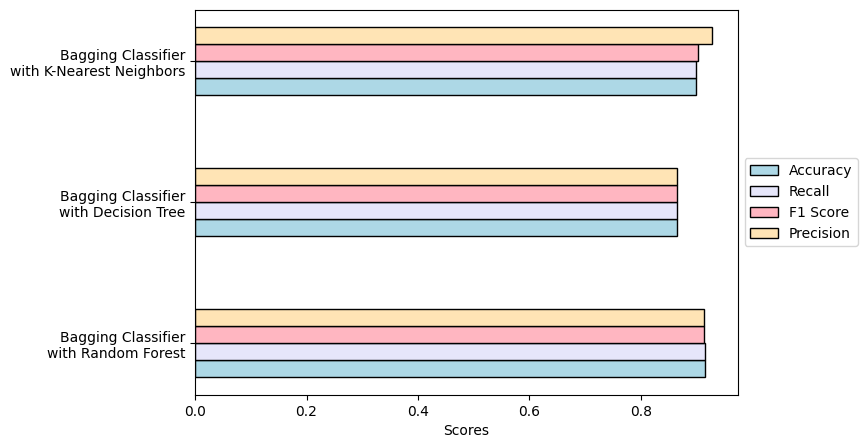

In [113]:
#B2.COMPARE MODELS
#Print the bar graph, comparing their performance

# Set the figure size
plt.figure(figsize=(7, 5))

# Calculate accuracy, recall, F1 score, and precision for each model
#Define the names of the models
models_bg = ['Bagging Classifier\nwith Random Forest', 'Bagging Classifier\nwith Decision Tree', 'Bagging Classifier\nwith K-Nearest Neighbors']
#Calculate the accuracy scores for each model
acc_scores_bg = [accuracy_score(y_test, rfc_bagging_pred), accuracy_score(y_test, dtc_bagging_pred), accuracy_score(y_test, knn_bagging_pred)]
#Calculate the recall scores for each model
rec_scores_bg = [recall_score(y_test, rfc_bagging_pred, average='weighted'), recall_score(y_test, dtc_bagging_pred, average='weighted'), recall_score(y_test, knn_bagging_pred, average='weighted')]
#Calculate the F1 scores for each model
f1_scores_bg = [f1_score(y_test, rfc_bagging_pred, average='weighted'), f1_score(y_test, dtc_bagging_pred, average='weighted'), f1_score(y_test, knn_bagging_pred, average='weighted')]
#Calculate the precision scores for each model
prec_scores_bg = [precision_score(y_test, rfc_bagging_pred, average='weighted'),precision_score(y_test, dtc_bagging_pred, average='weighted'),precision_score(y_test, knn_bagging_pred, average='weighted')]
# Set the bar height
bar_height = 0.12

# Set the positions of the bars
r1 = np.arange(len(acc_scores_bg))
r2 = [x + bar_height for x in r1]
r3 = [x + bar_height for x in r2]
r4 = [x + bar_height for x in r3]

# Create the bar plots for each score metric
#Bar for accuracy scores-lightblue
plt.barh(r1, acc_scores_bg, color='lightblue', height=bar_height, edgecolor='black', label='Accuracy')
#Bar for recall scores-lavender
plt.barh(r2, rec_scores_bg, color='lavender', height=bar_height, edgecolor='black', label='Recall')
#Bar for f1 scores-lightpink
plt.barh(r3, f1_scores_bg, color='lightpink', height=bar_height, edgecolor='black', label='F1 Score')
#Bar for precision scores-moccasin
plt.barh(r4, prec_scores_bg, color='moccasin', height=bar_height, edgecolor='black', label='Precision')

# Add yticks on the middle of the group bars
plt.yticks([r + bar_height*1.5 for r in range(len(acc_scores_bg))], models_bg)

# Set the x-axis label
plt.xlabel('Scores')

# Create a legend
plt.legend()

# Move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()

## PART C - USING THE ENSEMBLE TECHNIQUES-BOOSTING

### 1. APPLY MODELS 
     Applying the models to the prepared data by creating, training, predicting and evaluating the metrics.
     The models that will be applied to this dataset for boosting ensemble techniques are as follows:

    1. Adaboost Classifier
    2. Gradient Boosting Classifier
    3. XGBoost Classifier
   
### 2. COMPARE MODELS
    Analyzing the results of the models achieved by plotting a graph of all the three models based on their accuracy, recall, precision and f1-score.

In [114]:
#C1.APPLY MODELS
#----------------------------------------Creating Boosting classifiers---------------------------------------------#

# Create the AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

# Create the Gradient Boosting Classifier
gb = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, max_depth=2, subsample=1.0, random_state=None, max_features=None, verbose=0, warm_start=False)

# Create the XGBoost Classifier
xgb_clf = XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100, reg_lambda=0.1)

#----------------------------------------Training Boosting classifiers---------------------------------------------#

# Train the AdaBoost Classifier
ada.fit(X_train, y_train_res)

# Train the Gradient Boosting Classifier
gb.fit(X_train, y_train_res)

# Train the XGBoost Classifier
xgb_clf.fit(X_train, y_train_res)

#----------------------------------------Predicting Boosting classifiers-------------------------------------------#

# Predict using the AdaBoost Classifier
ada_pred = ada.predict(X_test)

# Predict using the Gradient Boosting Classifier
gb_pred = gb.predict(X_test)

# Predict using the XGBoost Classifier
xgb_pred = xgb_clf.predict(X_test)

#----------------------------------------Evaluating Boosting classifiers-------------------------------------------#

# Define the names of the models
models_bt = ['Adaboost\nClassifier', 'Gradient Boosting\nClassifier', 'XGBoost\nClassifier']
# Calculate the accuracy scores for each model
acc_scores_bt = [accuracy_score(y_test, ada_pred), accuracy_score(y_test, gb_pred), accuracy_score(y_test, xgb_pred)]
# Calculate the recall scores for each model
rec_scores_bt = [recall_score(y_test, ada_pred, average='weighted'), recall_score(y_test, gb_pred, average='weighted'), recall_score(y_test, xgb_pred, average='weighted')]
# Calculate the f1 scores for each model
f1_scores_bt = [f1_score(y_test, ada_pred, average='weighted'), f1_score(y_test, gb_pred, average='weighted'), f1_score(y_test, xgb_pred, average='weighted')]
# Calculate the precision scores for each model
prec_scores_bt = [precision_score(y_test, ada_pred, average='weighted'), precision_score(y_test, gb_pred, average='weighted'), precision_score(y_test, xgb_pred, average='weighted')]
# Calculate the confusion matrices for each model
confusion_matrices_bt = [confusion_matrix(y_test, ada_pred), confusion_matrix(y_test, gb_pred), confusion_matrix(y_test, xgb_pred)]

# Create a dataframe to store the scores
df_scores_bt = pd.DataFrame({
    'Model': models_bt,
    'Accuracy': acc_scores_bt,
    'Recall': rec_scores_bt,
    'F1 Score': f1_scores_bt,
    'Precision': prec_scores_bt,
    'Confusion Matrix': confusion_matrices_bt
})

# Set the index of the dataframe to the Model column
df_scores_bt.set_index('Model', inplace=True)

# Print the dataframe as a grid
print(tabulate(df_scores_bt, headers='keys', tablefmt='presto'))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


 Model             |   Accuracy |   Recall |   F1 Score |   Precision | Confusion Matrix
-------------------+------------+----------+------------+-------------+--------------------
 Adaboost          |   0.881356 | 0.881356 |   0.879977 |    0.879231 | [[11  4]
 Classifier        |            |          |            |             |  [ 3 41]]
 Gradient Boosting |   0.915254 | 0.915254 |   0.911943 |    0.915344 | [[11  4]
 Classifier        |            |          |            |             |  [ 1 43]]
 XGBoost           |   0.949153 | 0.949153 |   0.948562 |    0.948695 | [[13  2]
 Classifier        |            |          |            |             |  [ 1 43]]


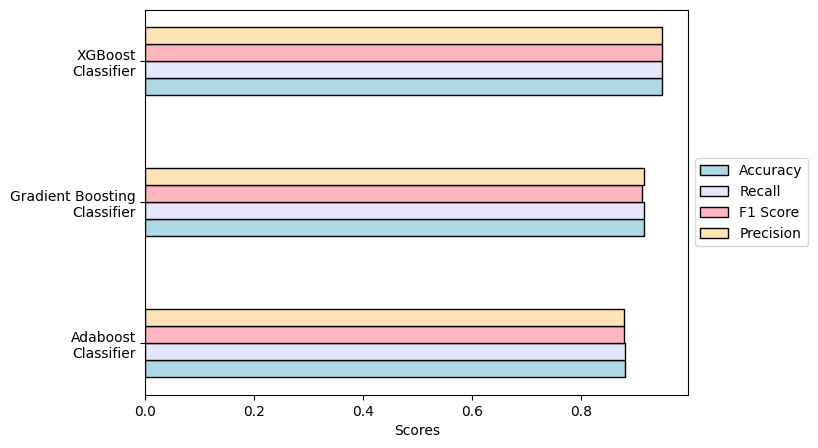

In [115]:
#C2.COMPARE MODELS
#Print the bar graph, comparing their performance

# Set the figure size
plt.figure(figsize=(7,5))

# Calculate accuracy, recall, F1 score, and precision for each model
# Define the names of the models
models_bt = ['Adaboost\nClassifier', 'Gradient Boosting\nClassifier', 'XGBoost\nClassifier']
# Calculate the accuracy scores for each model
acc_scores_bt = [accuracy_score(y_test, ada_pred), accuracy_score(y_test, gb_pred), accuracy_score(y_test, xgb_pred)]
# Calculate the recall scores for each model
rec_scores_bt = [recall_score(y_test, ada_pred, average='weighted'), recall_score(y_test, gb_pred, average='weighted'), recall_score(y_test, xgb_pred, average='weighted')]
# Calculate the f1 scores for each model
f1_scores_bt = [f1_score(y_test, ada_pred, average='weighted'), f1_score(y_test, gb_pred, average='weighted'), f1_score(y_test, xgb_pred, average='weighted')]
# Calculate the precision scores for each model
prec_scores_bt = [precision_score(y_test, ada_pred, average='weighted'), precision_score(y_test, gb_pred, average='weighted'), precision_score(y_test, xgb_pred, average='weighted')]

# Set the bar height
bar_height = 0.12

# Set the positions of the bars
r1 = np.arange(len(acc_scores_bt))
r2 = [x + bar_height for x in r1]
r3 = [x + bar_height for x in r2]
r4 = [x + bar_height for x in r3]

# Create the bar plots for each score metric
#Bar for accuracy scores-lightblue
plt.barh(r1, acc_scores_bt, color='lightblue', height=bar_height, edgecolor='black', label='Accuracy')
#Bar for recall scores-lavender
plt.barh(r2, rec_scores_bt, color='lavender', height=bar_height, edgecolor='black', label='Recall')
#Bar for f1 scores-lightpink
plt.barh(r3, f1_scores_bt, color='lightpink', height=bar_height, edgecolor='black', label='F1 Score')
#Bar for precision scores-moccasin
plt.barh(r4, prec_scores_bt, color='moccasin', height=bar_height, edgecolor='black', label='Precision')

# Add yticks on the middle of the group bars
plt.yticks([r + bar_height*1.5 for r in range(len(acc_scores_bt))], models_bt)

# Set the x-axis label
plt.xlabel('Scores')

# Create a legend
plt.legend()

# Move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Show the plot
plt.show()

## PART D - USING THE ENSEMBLE TECHNIQUES-STACKING
### 1. APPLY MODELS
 Applying the models to the prepared data by creating, training, predicting and evaluating the metrics.
 The models that will be applied to this dataset for stacking ensemble techniques are as follows:

1. Support Vector Classifier
2. Gaussian Naïve Bayes Classifier
3. K-Nearest Neighbors Classifier

Meta Classifier: Logistic Regression

In [94]:
#D1.APPLY MODEL
#----------------------------------------Creating Stacking classifier---------------------------------------------#
# Define the base models
base_models = [
    ('svc', SVC(kernel='linear', probability=True)),
    ('gnb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
]

# Define the meta model
meta_model = LogisticRegression(C=5)

# Define the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

#----------------------------------------Training Stacking classifier---------------------------------------------#

# Train the stacking classifier
stacking_model.fit(X_train, y_train_res)

#----------------------------------------Creating Stacking classifier---------------------------------------------#

# Predict using the tstacking classifier
y_pred = stacking_model.predict(X_test)

#----------------------------------------Evaluating Stacking classifier-------------------------------------------#

# Calculate accuracy
acc_scores_st = accuracy_score(y_test, y_pred)

# Calculate precision
prec_scores_st = precision_score(y_test, y_pred)

# Calculate recall
rec_scores_st = recall_score(y_test, y_pred)

# Calculate F1-score
f1_scores_st = f1_score(y_test, y_pred)

# Calculate Confusion Matrix
confusion_matrix_st = confusion_matrix(y_test, y_pred)

# Create a dataframe to store the scores
df_scores_st = pd.DataFrame({
    'Model': ['Stacking Classifier'],
    'Accuracy': [acc_scores_st],
    'Recall': [rec_scores_st],
    'F1 Score': [f1_scores_st],
    'Precision': [prec_scores_st],
    'Confusion Matrix':[confusion_matrix_st]
})

# Set the index of the dataframe to the Model column
df_scores_st.set_index('Model', inplace=True)

# Print the dataframe as a grid
print(tabulate(df_scores_st, headers='keys', tablefmt='presto'))

 Model               |   Accuracy |   Recall |   F1 Score |   Precision | Confusion Matrix
---------------------+------------+----------+------------+-------------+--------------------
 Stacking Classifier |   0.966102 | 0.977273 |   0.977273 |    0.977273 | [[14  1]
                     |            |          |            |             |  [ 1 43]]


## PART E - ANALYSE ALL MODELS TOGETHER
   
### 1. COMPARE MODELS
    Analyzing the results of the models achieved by plotting a graph of all the seven models based on their accuracy, recall, precision and f1-score.

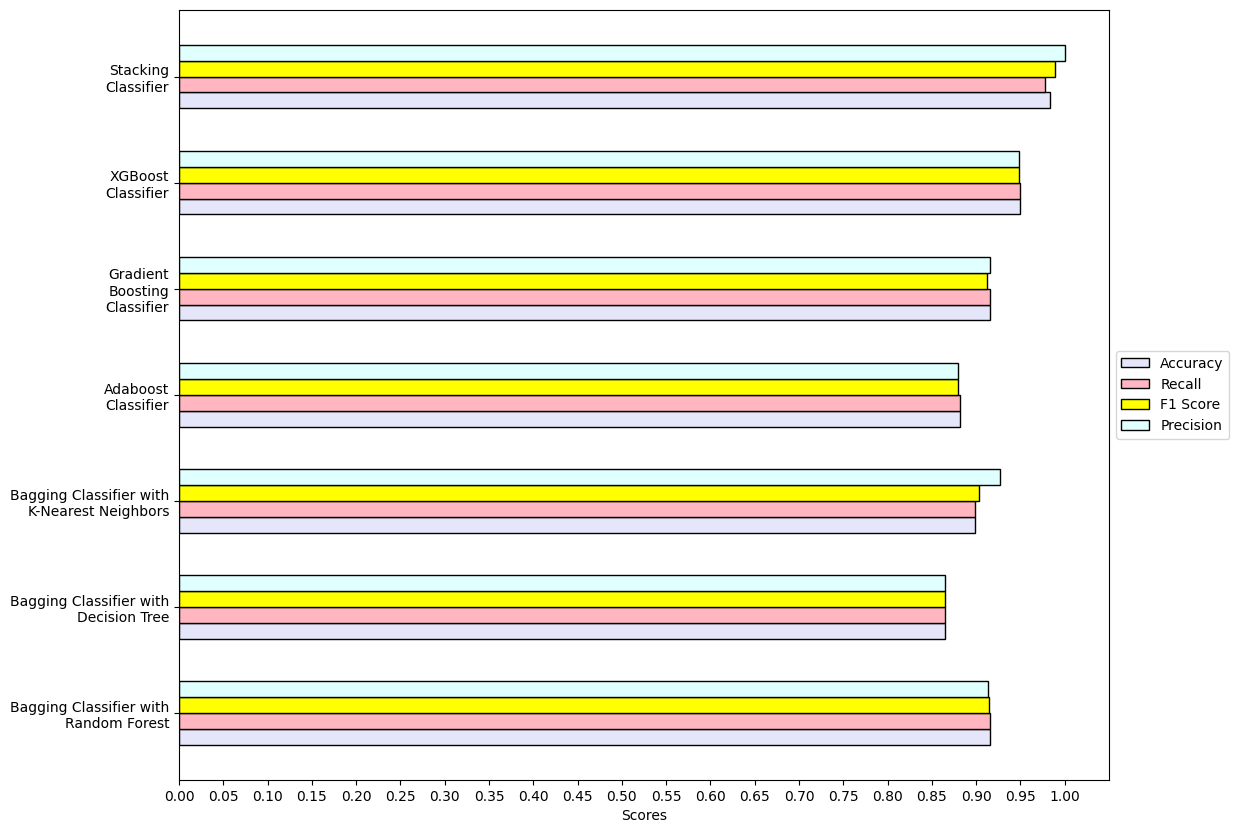

In [118]:
#E1.COMPARE MODELS
# Print the bar graph, comparing their performance

# Set the figure size
plt.figure(figsize=(12, 10))

# Calculate accuracy, recall, F1 score, and precision for each model
models = ['Bagging Classifier with\nRandom Forest', 'Bagging Classifier with\nDecision Tree', 'Bagging Classifier with\nK-Nearest Neighbors', 'Adaboost\nClassifier', 'Gradient\nBoosting\nClassifier', 'XGBoost\nClassifier','Stacking\nClassifier']
acc_scores = [accuracy_score(y_test, rfc_bagging_pred), accuracy_score(y_test, dtc_bagging_pred), accuracy_score(y_test, knn_bagging_pred), accuracy_score(y_test, ada_pred), accuracy_score(y_test, gb_pred), accuracy_score(y_test, xgb_pred),accuracy_score(y_test, y_pred)]
rec_scores = [recall_score(y_test, rfc_bagging_pred, average='weighted'), recall_score(y_test, dtc_bagging_pred, average='weighted'), recall_score(y_test, knn_bagging_pred, average='weighted'), recall_score(y_test, ada_pred, average='weighted'), recall_score(y_test, gb_pred, average='weighted'), recall_score(y_test, xgb_pred, average='weighted'),recall_score(y_test, y_pred)]
f1_scores = [f1_score(y_test, rfc_bagging_pred, average='weighted'), f1_score(y_test, dtc_bagging_pred, average='weighted'), f1_score(y_test, knn_bagging_pred, average='weighted'), f1_score(y_test, ada_pred, average='weighted'), f1_score(y_test, gb_pred, average='weighted'), f1_score(y_test, xgb_pred, average='weighted'),f1_score(y_test, y_pred)]
prec_scores = [precision_score(y_test, rfc_bagging_pred, average='weighted'), precision_score(y_test, dtc_bagging_pred, average='weighted'), precision_score(y_test, knn_bagging_pred, average='weighted'), precision_score(y_test, ada_pred, average='weighted'), precision_score(y_test, gb_pred, average='weighted'), precision_score(y_test, xgb_pred, average='weighted'),precision_score(y_test, y_pred)]
confusion_matrices = [confusion_matrix(y_test, rfc_bagging_pred), confusion_matrix(y_test, dtc_bagging_pred), confusion_matrix(y_test, knn_bagging_pred), confusion_matrix(y_test, ada_pred), confusion_matrix(y_test, gb_pred), confusion_matrix(y_test, xgb_pred),confusion_matrix(y_test, y_pred)]

# Set the bar height
bar_height = 0.15

# Set the positions of the bars
r1 = np.arange(len(acc_scores))
r2 = [x + bar_height for x in r1]
r3 = [x + bar_height for x in r2]
r4 = [x + bar_height for x in r3]

# Create the bar plots for each score metric
plt.barh(r1, acc_scores, color='lavender', height=bar_height, edgecolor='black', label='Accuracy')
plt.barh(r2, rec_scores, color='lightpink', height=bar_height, edgecolor='black', label='Recall')
plt.barh(r3, f1_scores, color='yellow', height=bar_height, edgecolor='black', label='F1 Score')
plt.barh(r4, prec_scores, color='lightcyan', height=bar_height, edgecolor='black', label='Precision')

# Add xticks on the middle of the group bars
plt.yticks([r + bar_height*1.5 for r in range(len(acc_scores))], models)

# Set the x-axis limits and ticks
plt.xlim(0, 1.05)
plt.xticks(np.arange(0, 1.05, 0.05))

# Set the x-axis label
plt.xlabel('Scores')

# Create a legend
plt.legend()

# Move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


# Show the plot
plt.show()

## PART F - USING THE ENSEMBLE TECHNIQUES-STACKING WITH NEURAL NETWORK

### 1. PLOT ROC-AUC MODEL - BEFORE SLP
   The ROC-AUC curve is plotted with the initial results obtained before tuning the model. 
   
### 2. APPLY MODELS

Applying the models to the prepared data by creating, training, predicting and evaluating the metrics. The models that will be applied to this dataset for stacking ensemble techniques are as follows:
Support Vector Classifier
Gaussian Naïve Bayes Classifier
K-Nearest Neighbors Classifier

Meta Classifier: SingleLayer Perceptron

   

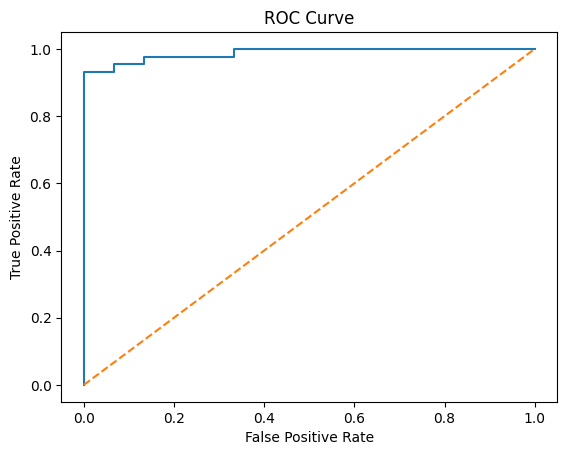

In [13]:
#F1. PLOT ROC-AUC MODEL - BEFORE SLP
# Get the predicted probabilities for the stacking classifier
y_pred_prob = stacking_model.predict_proba(X_test)[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# F2. APPLY MODEL
# Create a function to define the neural network model
def create_nn_model():
    model = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam', max_iter=1000)
    return model

# Define the base models
base_models = [
    ('svc', SVC(kernel='linear', probability=True)),
    ('gnb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=2))
]

# Define the meta model
meta_model = create_nn_model()

# Define the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_model.fit(X_train, y_train_res)

# Predict using the stacking classifier
y_pred = stacking_model.predict(X_test)


## PART G - ANALYSIS OF THE BEST MODEL
   The stacking classifier has proved to be the best out of the lot and has shown tremedous results and has been selected for further analysis. 

   ### 1. FIND BEST HYPERPARAMETERS FOR THE MODEL
   The gridserach method is used to find out the hyperparameters to tune, and the best values for them.
   ### 2. TUNE THE MODEL
   The resultant output of the gridsearch method is used to implement aand tune the model.
   ### 3. PLOT ROC-AUC MODEL - AFTER TUNING
   The ROC-AUC curve is plotted with the final results obtained after tuning the model.

In [105]:
#G1.FIND BEST HYPERPARAMETERS FOR THE MODEL

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.1, 1, 10],
    'knn__n_neighbors': [2, 3, 5, 7],
    'final_estimator__hidden_layer_sizes': [8, 16, 64, 256]    
}

# Define the GridSearchCV object
grid_model = GridSearchCV(stacking_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_model.fit(X_train, y_train_res)

# Print the best hyperparameters and their score
print("Best parameters: ", grid_model.best_params_)
print("Best score: ", grid_model.best_score_)


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron

Best parameters:  {'final_estimator__hidden_layer_sizes': 16, 'knn__n_neighbors': 2, 'svc__C': 0.1, 'svc__gamma': 1}
Best score:  0.9659698025551684


In [106]:
#G2.TUNE THE MODEL

# Create a function to define the neural network model
def create_nn_model():
    model = MLPClassifier(hidden_layer_sizes=(16,), activation='relu', solver='adam', max_iter=1000)
    return model

# Define the base models
base_models = [
    ('svc', SVC(kernel='linear', probability=True, C=0.1, gamma=1)),
    ('gnb', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=2))
]

# Define the meta model
meta_model = create_nn_model()

# Define the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_model.fit(X_train, y_train_res)

# Predict using the stacking classifier
y_pred = stacking_model.predict(X_test)

# Calculate accuracy
acc_scores_st = accuracy_score(y_test, y_pred)

# Calculate precision
prec_scores_st = precision_score(y_test, y_pred)

# Calculate recall
rec_scores_st = recall_score(y_test, y_pred)

# Calculate F1-score
f1_scores_st = f1_score(y_test, y_pred)

# Calculate Confusion Matrix
confusion_matrix_st = confusion_matrix(y_test, y_pred)

# Create a dataframe to store the scores
df_scores_st = pd.DataFrame({
    'Model': ['Stacking Classifier'],
    'Accuracy': [acc_scores_st],
    'Recall': [rec_scores_st],
    'F1 Score': [f1_scores_st],
    'Precision': [prec_scores_st],
    'Confusion Matrix':[confusion_matrix_st]
})

# Set the index of the dataframe to the Model column
df_scores_st.set_index('Model', inplace=True)

# Print the dataframe as a grid
print(tabulate(df_scores_st, headers='keys', tablefmt='presto'))

 Model               |   Accuracy |   Recall |   F1 Score |   Precision | Confusion Matrix
---------------------+------------+----------+------------+-------------+--------------------
 Stacking Classifier |   0.983051 | 0.977273 |   0.988506 |           1 | [[15  0]
                     |            |          |            |             |  [ 1 43]]


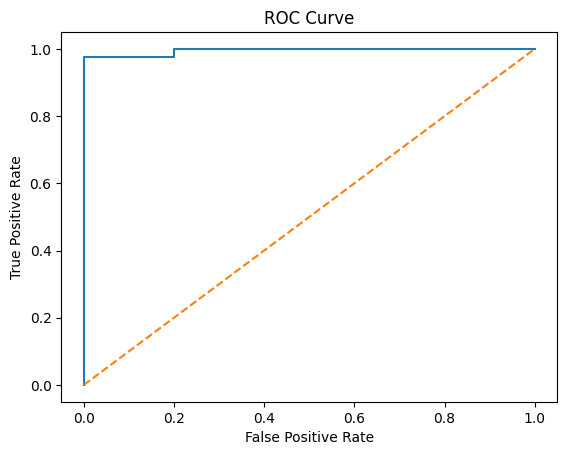

In [119]:
#G3. PLOT ROC-AUC - AFTER TUNING

# Get the predicted probabilities for the stacking classifier
y_pred_prob = stacking_model.predict_proba(X_test)[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()